# MDS Data Science Application

Thank you for your interest Mercury Data Science! As an applicant for the Data Scientist position, we request that you complete the following tasks outlined in this notebook and submit your results to Melissa Bennett (melissa@mercuryds.com).

Each task is designed to help us understand your technical and problem solving abilities. While we do not probibit the use of external resources when completing this task (e.g. stack overflow, google, etc.), we request that you cite the source of any code you reference online. Plagarism is unacceptable.

Don't hesitate to import from external libraries. In fact, we strongly encourage you to explore ways to engineer and augment the feature set in this dataset. Be creative!

As you develop your code and respond to the prompts below, please communicate your thoughts clearly and concisely through writing and visualizations. 

We look forward to seeing your responses!

## Extract Austin crime data

URL: "https://data.austintexas.gov/api/views/vmn9-3bvu/rows.csv?accessType=DOWNLOAD"

If you're unable to download the file, please let us know. It may have been moved.

### Importing required libraries

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import scoreatpercentile
import datetime  
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import math
from sklearn.preprocessing import LabelEncoder
import re
import lightgbm
from lightgbm import LGBMRegressor
from lightgbm import LGBMClassifier


In [3]:
data = pd.read_csv("https://data.austintexas.gov/api/views/vmn9-3bvu/rows.csv?accessType=DOWNLOAD",parse_dates= ['Occurred Date','Report Date','Clearance Date'])

## Exploratory data analysis

Examine the data. Visualize the features, identify outliers, etc. Report your findings and describe any tables and figures you generate.

In [4]:
#Checking the dimension of the data
print(data.shape)

(102616, 27)


In [5]:
data.head(5)

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,20185000070,THEFT,600,N,01/01/2018 05:00:00 PM,2018-01-01,1700,01/01/2018 05:27:00 PM,2018-01-01,1727,...,NaN,N,2018-01-02,23H,Theft,3113952.0,3113952.0,30.266100,-97.744003,"(30.26610034, -97.74400318)"
1,201810989,THEFT OF LICENSE PLATE,614,N,12/30/2017 12:00:00 PM,2017-12-30,1200,01/01/2018 09:03:00 AM,2018-01-01,903,...,NaN,N,2018-01-03,23G,Theft,3131137.0,3131137.0,30.217300,-97.690889,"(30.21729993, -97.69088863)"
2,201810354,DRIVING WHILE INTOX / FELONY,2109,N,01/01/2018 01:36:00 AM,2018-01-01,136,01/01/2018 05:06:00 AM,2018-01-01,506,...,NaN,C,2018-01-01,NaN,NaN,3135794.0,3135794.0,30.433722,-97.670173,"(30.43372229, -97.67017337)"
3,201811106,BURGLARY NON RESIDENCE,502,N,01/01/2018 05:00:00 AM,2018-01-01,500,01/01/2018 11:31:00 AM,2018-01-01,1131,...,NaN,N,2018-02-12,220,Burglary,3103387.0,3103387.0,30.464765,-97.772208,"(30.4647654, -97.77220766)"
4,201811667,AGG ROBBERY/DEADLY WEAPON,300,N,01/01/2018 07:47:00 PM,2018-01-01,1947,01/01/2018 07:47:00 PM,2018-01-01,1947,...,NaN,C,2018-01-03,120,Robbery,3128703.0,3128703.0,30.365829,-97.694539,"(30.36582905, -97.69453919)"


In [6]:
#This gives an idea about the distribution of the data   
data.describe()

,Incident Number,Highest Offense Code,Occurred Time,Report Time,Zip Code,Council District,PRA,Census Tract,X-coordinate,Y-coordinate,Latitude,Longitude
count,1.026160e+05,102616.000000,102616.000000,102616.000000,101732.000000,101388.000000,101861.000000,55499.000000,1.019330e+05,1.019330e+05,100263.000000,100263.000000
mean,1.748756e+10,1691.893428,1341.123119,1345.384034,78732.341318,5.026709,400.773407,43.852695,3.065753e+06,3.065753e+06,30.293174,-97.734335
std,3.324207e+10,1173.877117,703.993459,648.424250,25.444674,2.834241,361.927860,419.890435,4.115053e+05,4.115053e+05,0.124146,0.312496
min,2.018189e+06,100.000000,0.000000,0.000000,78610.000000,1.000000,1.000000,1.010000,0.000000e+00,0.000000e+00,0.000120,-98.005682
25%,2.018138e+10,601.000000,852.000000,947.000000,78719.000000,3.000000,249.000000,17.220000,3.107126e+06,3.107126e+06,30.231709,-97.763619
50%,2.018274e+10,1199.000000,1447.000000,1417.000000,78741.000000,4.000000,381.000000,18.340000,3.116761e+06,3.116761e+06,30.277312,-97.733789
75%,2.018502e+10,2716.000000,1930.000000,1858.000000,78752.000000,7.000000,480.000000,23.120000,3.126801e+06,3.126801e+06,30.355581,-97.701569
max,2.018184e+12,4205.000000,2359.000000,2359.000000,78759.000000,10.000000,9701.000000,9800.000000,3.889524e+07,3.889524e+07,30.562258,-0.000134


In [7]:
#Droping incident number as it is not relevant and is random, dropping location and Report Date Time as the same information in contained in latitude and longitude
data.drop(['Incident Number','Location','Report Date Time','Occurred Date Time'],axis=1,inplace=True)

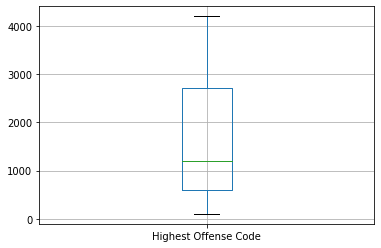

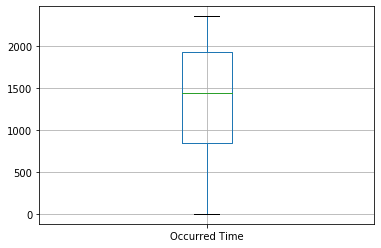

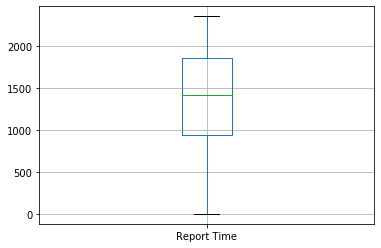

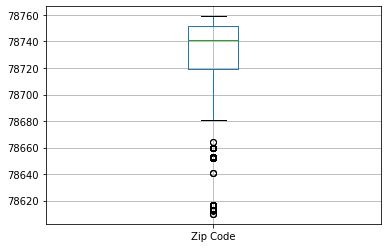

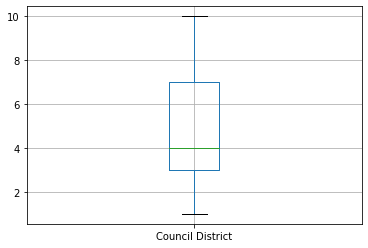

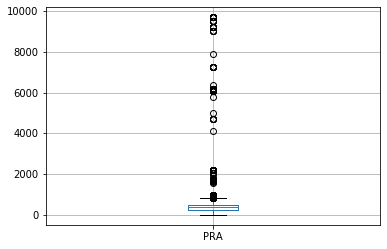

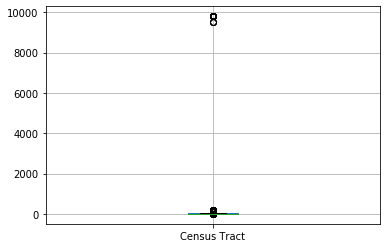

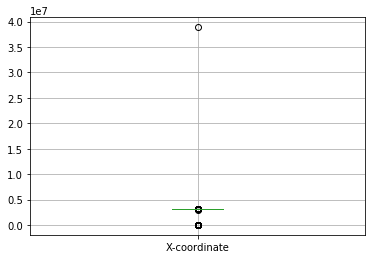

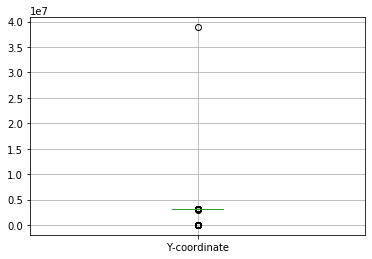

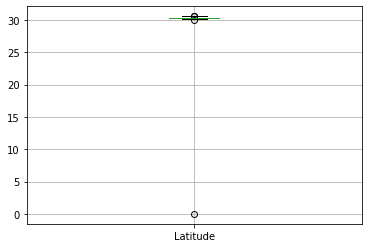

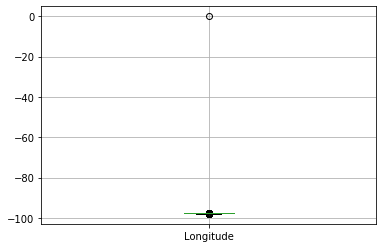

In [8]:
for col in data.columns:
    if(is_numeric_dtype(data[col])):
        data.boxplot(column=col)
        plt.show()

### From the above graphs, PRA is left skewed, census tract has few outliers, X-Y corrdinate and Longitude-Latitude have outlier as well.

In [9]:
#checking how many null values are present in each column
data.isnull().sum()

Highest Offense Description        0
Highest Offense Code               0
Family Violence                    0
Occurred Date                      0
Occurred Time                      0
Report Date                        0
Report Time                        0
Location Type                    640
Address                            0
Zip Code                         884
Council District                1228
APD Sector                       581
APD District                     614
PRA                              755
Census Tract                   47117
Clearance Status                9593
Clearance Date                  9595
UCR Category                   65605
Category Description           65605
X-coordinate                     683
Y-coordinate                     683
Latitude                        2353
Longitude                       2353
dtype: int64

In [10]:
#dropping columns where null count is a certain threshold, in this case only 20% null values are allowed
data=data.dropna(thresh=data.shape[0]*0.80,axis=1)

In [11]:
data.isnull().sum()

Highest Offense Description       0
Highest Offense Code              0
Family Violence                   0
Occurred Date                     0
Occurred Time                     0
Report Date                       0
Report Time                       0
Location Type                   640
Address                           0
Zip Code                        884
Council District               1228
APD Sector                      581
APD District                    614
PRA                             755
Clearance Status               9593
Clearance Date                 9595
X-coordinate                    683
Y-coordinate                    683
Latitude                       2353
Longitude                      2353
dtype: int64

In [12]:
data.dtypes

Highest Offense Description            object
Highest Offense Code                    int64
Family Violence                        object
Occurred Date                  datetime64[ns]
Occurred Time                           int64
Report Date                    datetime64[ns]
Report Time                             int64
Location Type                          object
Address                                object
Zip Code                              float64
Council District                      float64
APD Sector                             object
APD District                           object
PRA                                   float64
Clearance Status                       object
Clearance Date                 datetime64[ns]
X-coordinate                          float64
Y-coordinate                          float64
Latitude                              float64
Longitude                             float64
dtype: object

## Feature engineering

Perform any feature engineering tasks below.

In [13]:
#Feature engineering
data['occured_day'] = data['Occurred Date'].dt.day
data['occured_month'] = data['Occurred Date'].dt.month
data['report_day'] = data['Report Date'].dt.day
data['report_month'] = data['Report Date'].dt.month
data['report_hour_of_the_day']=(data['Report Time']/100).apply(np.floor)
data['occured_hour_of_the_day']=(data['Occurred Time']/100).apply(np.floor)
data['report_day_of_week'] = data['Report Date'].dt.weekday
data['occured_day_of_week'] = data['Report Date'].dt.weekday
data['clearance_day'] = data['Clearance Date'].dt.day
data['clearance_month'] = data['Clearance Date'].dt.month
data['clearance_day_of_week'] = data['Clearance Date'].dt.weekday

data.drop(['Occurred Date','Report Date','Report Time','Occurred Time','Clearance Date'],axis=1,inplace=True)


In [16]:
data.head(2)

,Highest Offense Description,Highest Offense Code,Family Violence,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,...,occured_month,report_day,report_month,report_hour_of_the_day,occured_hour_of_the_day,report_day_of_week,occured_day_of_week,clearance_day,clearance_month,clearance_day_of_week
0,THEFT,600,N,DEPARTMENT / DISCOUNT STORE,320 CONGRESS AVE,78701.0,9.0,GE,4,405.0,...,1,1,1,17.0,17.0,0,0,2.0,1.0,1.0
1,THEFT OF LICENSE PLATE,614,N,PARKING LOTS / GARAGE,7625 E BEN WHITE BLVD SVRD EB,78744.0,2.0,HE,6,498.0,...,12,1,1,9.0,12.0,0,0,3.0,1.0,2.0


In [17]:
#imputing the null values
for col in data.columns:
    if(is_string_dtype(data[col])):
        data[col].fillna("missing", inplace = True)
    elif(is_numeric_dtype(data[col])):
        data[col].fillna(-999, inplace = True)

In [18]:
#Converting Object to category
data[data.select_dtypes(['object']).columns] = data.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [19]:
data.head(10)

,Highest Offense Description,Highest Offense Code,Family Violence,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,...,occured_month,report_day,report_month,report_hour_of_the_day,occured_hour_of_the_day,report_day_of_week,occured_day_of_week,clearance_day,clearance_month,clearance_day_of_week
0,THEFT,600,N,DEPARTMENT / DISCOUNT STORE,320 CONGRESS AVE,78701.0,9.0,GE,4,405.0,...,1,1,1,17.0,17.0,0,0,2.0,1.0,1.0
1,THEFT OF LICENSE PLATE,614,N,PARKING LOTS / GARAGE,7625 E BEN WHITE BLVD SVRD EB,78744.0,2.0,HE,6,498.0,...,12,1,1,9.0,12.0,0,0,3.0,1.0,2.0
2,DRIVING WHILE INTOX / FELONY,2109,N,STREETS / HWY / ROAD / ALLEY,14300 N IH 35 SVRD SB,78728.0,7.0,ED,6,173.0,...,1,1,1,5.0,1.0,0,0,1.0,1.0,0.0
3,BURGLARY NON RESIDENCE,502,N,CAMP / CAMPGROUND,9100 MEADOWHEATH DR,78729.0,6.0,AD,4,1641.0,...,1,1,1,11.0,5.0,0,0,12.0,2.0,0.0
4,AGG ROBBERY/DEADLY WEAPON,300,N,DEPARTMENT / DISCOUNT STORE,9717 N LAMAR BLVD,78753.0,4.0,ED,1,240.0,...,1,1,1,19.0,19.0,0,0,3.0,1.0,2.0
5,ASSAULT W/INJURY-FAM/DATE VIOL,900,Y,RESIDENCE / HOME,1800 E STASSNEY LN,78744.0,2.0,FR,5,650.0,...,1,1,1,23.0,23.0,0,0,10.0,1.0,2.0
6,AGG ASSAULT,402,N,BAR / NIGHT CLUB,500 RIO GRANDE ST,78701.0,9.0,GE,1,373.0,...,1,1,1,3.0,3.0,0,0,8.0,2.0,3.0
7,CRIMINAL TRESPASS/HOTEL,2722,N,HOTEL / MOTEL / ETC.,3017 S IH 35 SVRD NB,78741.0,3.0,HE,2,482.0,...,1,1,1,4.0,4.0,0,0,2.0,1.0,1.0
8,ASSAULT W/INJURY-FAM/DATE VIOL,900,Y,RESIDENCE / HOME,1401 E RUNDBERG LN,78753.0,4.0,ED,3,251.0,...,1,1,1,2.0,2.0,0,0,5.0,1.0,4.0
9,WARRANT ARREST NON TRAFFIC,3442,N,PARKING LOTS / GARAGE,6812 N LAMAR BLVD,78757.0,7.0,ID,7,277.0,...,1,1,1,16.0,16.0,0,0,1.0,1.0,0.0


In [20]:
#Most crime by location type
print(data['Location Type'].value_counts())

RESIDENCE / HOME                                  40910
STREETS / HWY / ROAD / ALLEY                      19461
PARKING LOTS / GARAGE                             11943
OTHER / UNKNOWN                                    7397
DEPARTMENT / DISCOUNT STORE                        2417
RESTAURANTS                                        2188
HOTEL / MOTEL / ETC.                               2152
COMMERCIAL / OFFICE BUILDING                       2066
GROCERY / SUPERMARKET                              1989
CONVENIENCE STORE                                  1363
GAS / SERVICE STATIONS                             1269
BAR / NIGHT CLUB                                   1188
PARK / PLAYGROUND                                  1104
DRUG STORE / DR. OFFICE / HOSPITAL                 1031
TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS)      712
missing                                             640
SPECIALTY  STORE (TV  FUR ETC.)                     636
GOVERNMENT / PUBLIC BUILDING                    

### Home/ Residence have a lot of case which means there are a lot of cases of domestic violence and robberies.

In [21]:
#Most crime by occured day
print(data['occured_day'].value_counts())

1     4197
17    3522
10    3455
6     3445
18    3424
26    3404
3     3397
16    3395
7     3388
14    3382
5     3381
15    3378
9     3378
28    3375
24    3368
23    3338
2     3319
21    3317
27    3311
12    3309
19    3306
8     3304
4     3283
13    3267
25    3260
20    3256
22    3246
11    3210
30    3142
29    3001
31    1858
Name: occured_day, dtype: int64


### Strangely 1st day of the month records for the most cases.

In [22]:
#Most crime by hour of the day
print(data['occured_hour_of_the_day'].value_counts())

12.0    7256
18.0    6180
22.0    6160
0.0     5997
20.0    5996
19.0    5788
17.0    5773
21.0    5747
23.0    5297
16.0    5007
15.0    4713
14.0    4379
13.0    4129
1.0     4002
2.0     3857
11.0    3641
10.0    3632
9.0     3051
8.0     2925
3.0     2609
7.0     1934
4.0     1758
5.0     1393
6.0     1392
Name: occured_hour_of_the_day, dtype: int64


### Evenings and mornings are mostly safe. Late night and noon are the times where cases occur the most.

In [23]:
#Most crime by day of the week
print(data['occured_day_of_week'].value_counts())

0    15762
4    15611
1    14959
2    14853
3    14812
5    13612
6    13007
Name: occured_day_of_week, dtype: int64


### Weekdays are safe maybe because there are no break ins from the theifs when poeple are inside their homes. People usually work during weekdays and hence more cases where location is home/household.

In [24]:
#Removing the outliers
data=data[data['X-coordinate']<38895239.0]
data=data[data['X-coordinate']>0.0]

In [25]:
data.columns

Index(['Highest Offense Description', 'Highest Offense Code',
       'Family Violence', 'Location Type', 'Address', 'Zip Code',
       'Council District', 'APD Sector', 'APD District', 'PRA',
       'Clearance Status', 'X-coordinate', 'Y-coordinate', 'Latitude',
       'Longitude', 'occured_day', 'occured_month', 'report_day',
       'report_month', 'report_hour_of_the_day', 'occured_hour_of_the_day',
       'report_day_of_week', 'occured_day_of_week', 'clearance_day',
       'clearance_month', 'clearance_day_of_week'],
      dtype='object')

In [26]:
data['APD District'].value_counts()

2          20314
1          19073
3          12462
4          12062
5          10111
7           9739
6           9042
8           6541
S            412
88           226
D            131
B             49
A             47
P             24
missing       15
C             14
Name: APD District, dtype: int64

### Visualizations

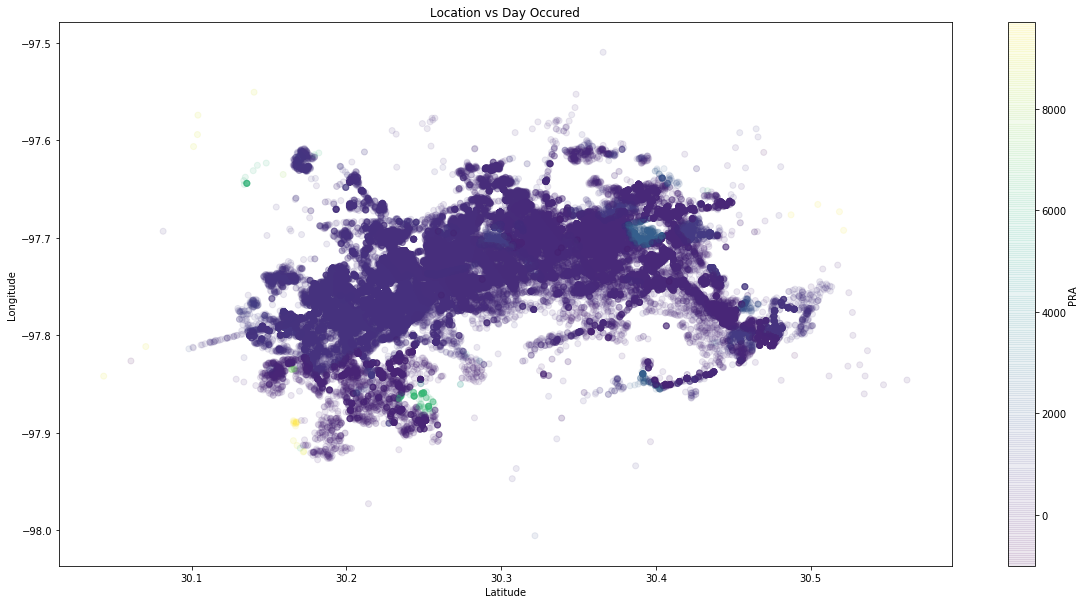

In [27]:
plt.figure(figsize=(20,10))
plt.subplot(1, 1, 1)
plt.scatter(data['Latitude'], data['Longitude'], alpha=0.1,c=data['PRA'])
plt.title('Location vs PRA')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
cbar= plt.colorbar()
cbar.set_label("PRA", labelpad=+1)
plt.show()

### There are a few clusters which are clearly distinguishable from the rest.

In [28]:
lb_make = LabelEncoder()
APD_Sector=lb_make.fit_transform(data["APD Sector"])
Clearance_Status=lb_make.fit_transform(data["Clearance Status"])

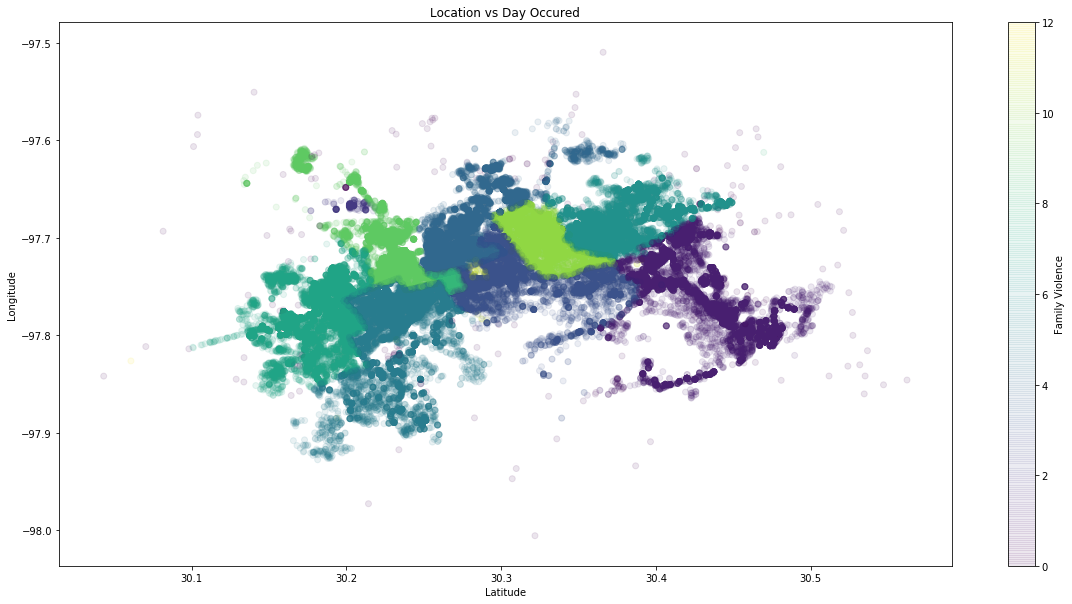

In [30]:
plt.figure(figsize=(20,10))
plt.subplot(1, 1, 1)
plt.scatter(data['Latitude'], data['Longitude'], alpha=0.1,c=APD_Sector)
plt.title('Location vs APD_Sector')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
cbar= plt.colorbar()
cbar.set_label("APD Sector", labelpad=+1)
plt.show()

### Most of the sectors are evenly distributed(good job APD!)

In [39]:
data['clearance_day']=np.where(data['clearance_day']==-999.0,-1,data['clearance_day'])
data['clearance_month']=np.where(data['clearance_month']==-999.0,-1,data['clearance_month'])
data['clearance_day_of_week']=np.where(data['clearance_day_of_week']==-999.0,-1,data['clearance_day_of_week'])

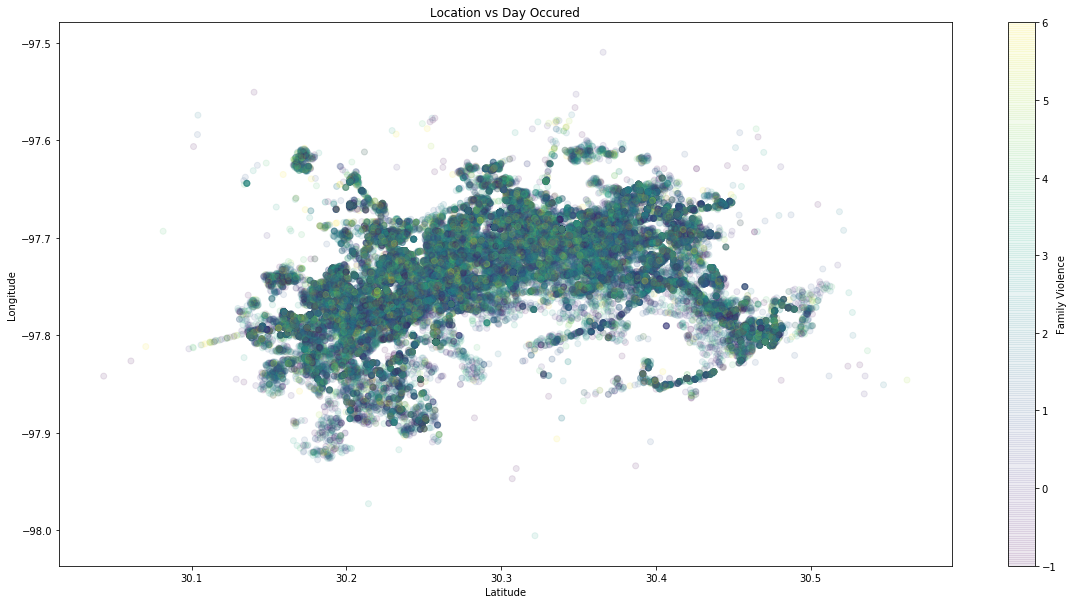

In [41]:
plt.figure(figsize=(20,10))
plt.subplot(1, 1, 1)
plt.scatter(data['Latitude'], data['Longitude'], alpha=0.1,c=data['clearance_day_of_week'])
plt.title('Location vs clearance day of week')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
cbar= plt.colorbar()
cbar.set_label("clearance day of week", labelpad=+1)
plt.show()

In [51]:
#Converting address category to string
data['Address']=data['Address'].astype(str)

### Most of the clearances are done on weekdays

In [79]:
#Categorizing address into address type
data['Address_type']=data['Address']
for i, row in data.iterrows():
    x=re.search("ST", row['Address'])
    if(x):
        data.at[i, 'Address_type'] = "ST"
    else:
        x=re.search("BLVD", row['Address'])
        if(x):
            data.at[i, 'Address_type'] = "BLVD"
        else:
            x=re.search("RD", row['Address'])
            if(x):
                data.at[i, 'Address_type'] = "RD"
            else:
                x=re.search("LN", row['Address'])
                if(x):
                    data.at[i, 'Address_type'] = "LN"
                else:
                    x=re.search("HWY", row['Address'])
                if(x):
                    data.at[i, 'Address_type'] = "HWY"
                else:
                    x=re.search("SVRD", row['Address'])
                    if(x):
                        data.at[i, 'Address_type'] = "SVRD"
                    else:   
                        data.at[i, 'Address_type'] = "OTHERS"

In [87]:
#Dropping columns from which important data has been extracted
data.drop(['Address','X-coordinate','Y-coordinate'],axis=1,inplace=True)

Identify and describe an interesting prediction task (regression or classification) based on your analysis. The next sections will involve generating a predictive model that performs this task.

### Lets predict the longitude and latitude of the incident place so that the police can reach the place in it quicker!

## Model building

Train a statistical model of your choosing to perform this prediction task. Describe each step of your code in comments and explain your rationale for choosing a particular model.

Note: We do not expect incredibly high model accuracy. Nevertheless, if model accuracy is low, please include a written discussion to explain why this might be the case. We want to understand your thought process.

In [103]:
data['Address_type']=data['Address_type'].astype('category')

In [104]:
#label encoding on categorical features
for cols in data.columns:
    if(is_string_dtype(cols)):
        lb_make = LabelEncoder()
        data[col] = lb_make.fit_transform(data[col])    

In [138]:
#Splitting data into train and validation sets
train_features_Longitude, val_features_Longitude, train_labels_Longitude, val_labels_Longitude = train_test_split(
    data.drop(['Longitude','Latitude'],axis=1),
    data['Longitude'],
    test_size=0.1)

train_features_Latitude, val_features_Latitude, train_labels_Latitude, val_labels_Latitude = train_test_split(
    data.drop(['Longitude','Latitude'],axis=1),
    data['Latitude'],
    test_size=0.1)

x_train_longitude=data.drop(['Longitude','Latitude'],axis=1)
y_train_longitude=data.Longitude

x_train_latitude=data.drop(['Longitude','Latitude'],axis=1)
y_train_latitude=data.Latitude

In [139]:
lightgbm = lgb.LGBMRegressor(objective='regression', 
                                       num_leaves=6,
                                       learning_rate=0.05, 
                                       n_estimators=6000,
                                       max_bin=150, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )
lgb_model = lightgbm.fit(train_features_Longitude, train_labels_Longitude)

In [140]:
preds_Longitude=lgb_model.predict(val_features_Longitude)

In [141]:
lightgbm = lgb.LGBMRegressor(objective='regression', 
                                       num_leaves=6,
                                       learning_rate=0.05, 
                                       n_estimators=6000,
                                       max_bin=150, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )
lgb_model = lightgbm.fit(train_features_Latitude, train_labels_Latitude)

In [142]:
preds_Latitude=lgb_model.predict(val_features_Latitude)

## Model validation

Demonstrate the validity of your model. Discuss your validation strategy and how various error cases might be addressed in the absence of additional data.

In [191]:
#I will make euclidean distance as the evaluation metric as it will tell me how far was my prediction from the actual location.
diff_latitude_squared=(preds_Latitude-val_labels_Latitude)*(preds_Latitude-val_labels_Latitude)
diff_longitude_squared=(preds_Longitude-val_labels_Longitude)*(preds_Longitude-val_labels_Longitude)

In [196]:
print("-----------Overall mean of squared error in latitude----------")
print(np.mean(diff_latitude_squared))
print("-----------Overall mean of squared error in lontitude----------")
print(np.mean(diff_longitude_squared))

-----------Overall mean of squared error in latitude----------
3.389268354666646e-05
-----------Overall mean of squared error in lontitude----------
4.9591841070649636e-05


### The error in the location is pretty low which means it's good enough for police to reach the crime scene!